### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [47]:
%matplotlib inline
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [48]:
df_rating = pd.read_csv('Data.csv')
df_user = pd.read_csv('user.csv')
df_movie = pd.read_csv('item.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [49]:
df_rating.head()
df_rating.info()
df_rating.shape
df_rating.describe()
df_rating.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [7]:
df_user.head()
df_user.info()
df_user.shape
df_user.describe()
df_user.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

In [50]:
df_movie.head()
df_movie.info()
df_movie.shape
df_movie.describe()
df_movie.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
movie id        1681 non-null int64
movie title     1681 non-null object
release date    1681 non-null object
unknown         1681 non-null int64
Action          1681 non-null int64
Adventure       1681 non-null int64
Animation       1681 non-null int64
Childrens       1681 non-null int64
Comedy          1681 non-null int64
Crime           1681 non-null int64
Documentary     1681 non-null int64
Drama           1681 non-null int64
Fantasy         1681 non-null int64
Film-Noir       1681 non-null int64
Horror          1681 non-null int64
Musical         1681 non-null int64
Mystery         1681 non-null int64
Romance         1681 non-null int64
Sci-Fi          1681 non-null int64
Thriller        1681 non-null int64
War             1681 non-null int64
Western         1681 non-null int64
dtypes: int64(20), object(2)
memory usage: 289.0+ KB


movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

#### 4. Find the number of movies per genre using the item data - 5 marks

In [59]:
df_movie.loc[:,'Action':'Western'].sum()

Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

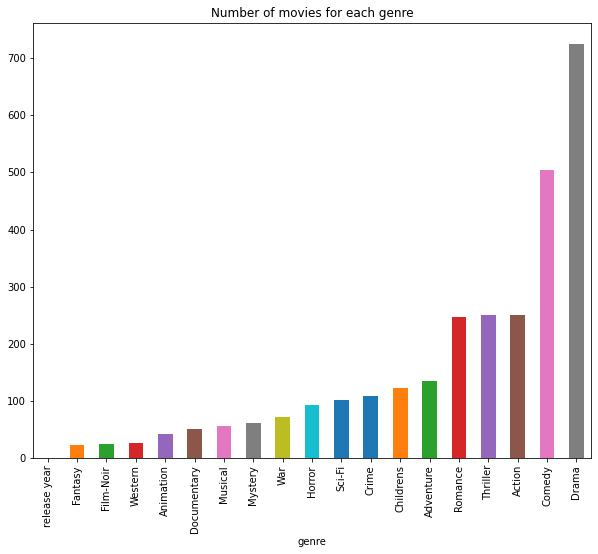

In [40]:

df_movie_genre = pd.DataFrame(columns=['genre', 'num_of_movies'])
genres_list = get_genres()
for genre in genres_list:
    row = genre, df_movie[df_movie[genre]==1][['movie id']].count()
    df_movie_genre.loc[len(df_movie_genre)] = row
df_movie_genre['num_of_movies'] = df_movie_genre['num_of_movies'].astype(np.int32)
df_movie_genre = df_movie_genre.sort_values('num_of_movies', ascending=True).set_index('genre')

plot_fig = df_movie_genre['num_of_movies'].plot(kind='bar', figsize=(10,8))
plot_fig.set_title('Number of movies for each genre')
plot_fig.set_xlabel('genre');


#### 5. Find the movies that have more than one genre - 2.5 marks

In [77]:
df_movie['total_genres'] = df_movie.loc[:,'Action':'Western'].sum(axis=1)
df_movie_multiple_genres_filtered = df_movie[df_movie['total_genres'] > 1]
df_movie_multiple_genres_filtered[['movie title','total_genres']]

,movie title,total_genres
0,Toy Story,3
1,GoldenEye,3
3,Get Shorty,3
4,Copycat,3
6,Twelve Monkeys,2
7,Babe,3
9,Richard III,2
10,Seven (Se7en),2
11,"Usual Suspects, The",2
13,"Postino, Il",2


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [78]:
df_movie.drop(df_movie[df_movie['unknown'] == 1].index, inplace = True)
df_movie.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total_genres,release year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,3,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,3,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,3,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,3,1995


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

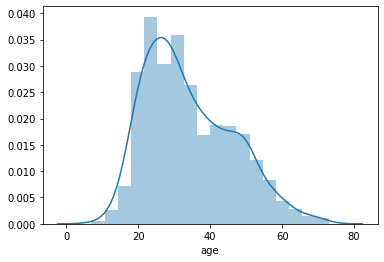

In [7]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.
sns.distplot(df_user['age'])

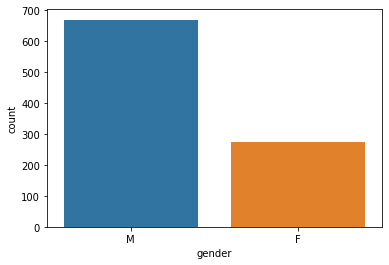

In [9]:
gender_count = sns.countplot(x="gender", data=df_user)

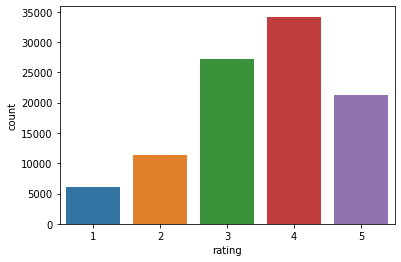

In [8]:
rating_count = sns.countplot(x="rating", data=df_rating)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

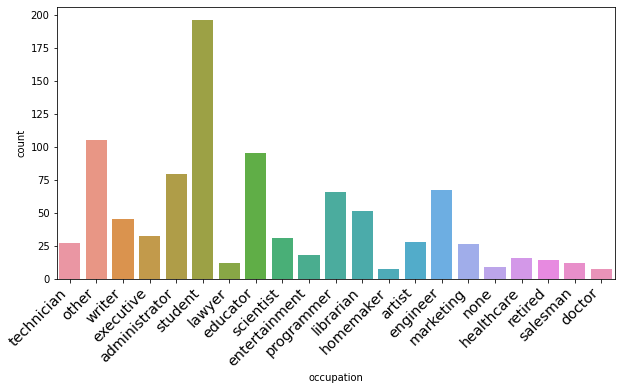

In [33]:
plt.figure(figsize=(10,5))
occupation_count = sns.countplot(x="occupation", data=df_user)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

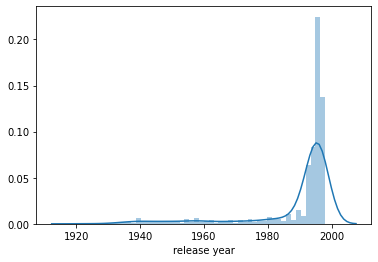

In [34]:
df_movie['release year'] = df_movie['release date'].apply(lambda x: x.split('-')[2])
df_movie.head()
sns.distplot(df_movie['release year'])

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [83]:
def get_year_from_str(dt_as_str):
    return dt_as_str.split('-')[2]

In [95]:
df_movie['release year'] = df_movie['release date'].apply(lambda x: get_year_from_str(x))
df_gene_by_year = df_movie.groupby('release year').sum()
df_gene_by_year = df_gene_by_year.drop(columns ='movie id').T
df_gene_by_year

release year,1922,1926,1930,1931,1932,1933,1934,1935,1936,1937,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
unknown,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action,0,0,0,0,0,0,0,0,0,0,...,6,7,2,8,20,30,40,44,46,12
Adventure,0,0,0,0,0,0,0,0,0,0,...,4,1,1,1,9,13,22,24,20,3
Animation,0,0,0,0,0,0,0,0,0,1,...,0,0,1,2,1,4,6,9,3,0
Childrens,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,6,15,21,21,22,1
Comedy,0,0,0,0,0,1,2,2,1,2,...,3,6,6,12,39,82,63,108,87,13
Crime,0,0,0,1,0,0,0,0,0,0,...,1,3,0,5,7,8,11,21,30,7
Documentary,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,4,9,5,18,6,3
Drama,0,1,1,0,0,0,1,0,1,1,...,8,12,11,14,64,97,89,170,113,33
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,3,3,6,4,1


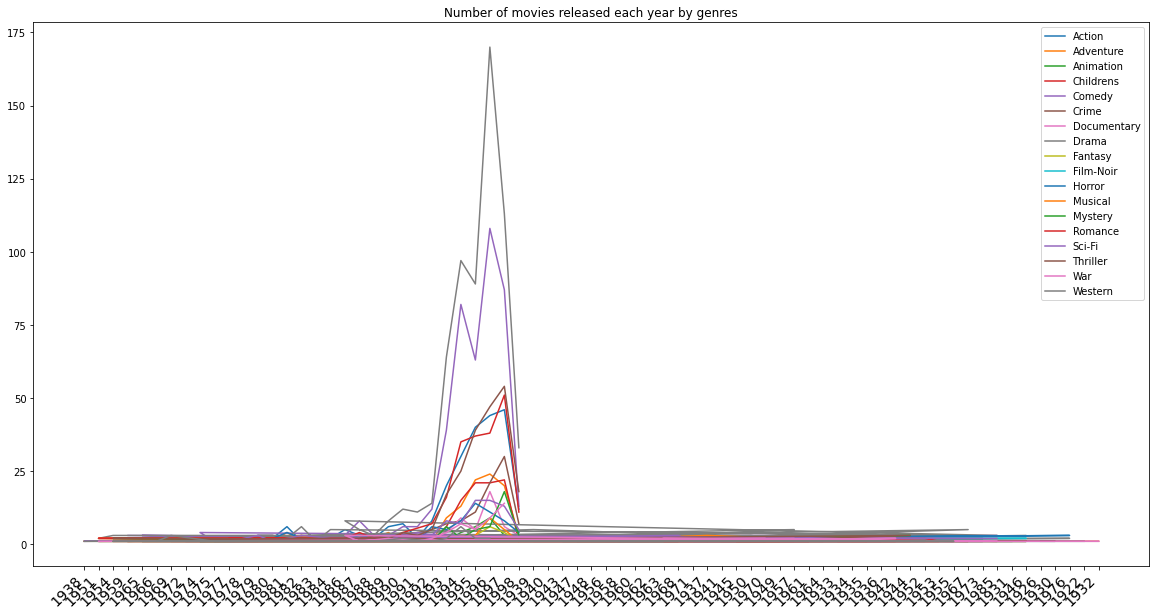

In [68]:
plt.figure(figsize=(20,10))
df_movie['release year'] = df_movie['release date'].apply(lambda x: get_year_from_str(x))
genres_list = df_movie.loc[:,"Action": "Western"]
for genre in genres_list:
    df_genre = df_movie[df_movie[genre]==1][['release year', 'movie id']]
    df_genre = df_genre.groupby(['release year']).count().reset_index().rename(columns={'release year':'year', 'movie id':'#movies'})
    plt.plot(df_genre['year'], df_genre['#movies'], label=genre)
plt.title('Number of movies released each year by genres')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.legend()
plt.show()

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [108]:
df_rating_movie = df_rating.merge(df_movie, on='movie id', how='inner')
df_final_merged = df_rating_movie.merge(df_user, on='user id', how='inner')
df_final_merged[['user id', 'movie id', 'rating', 'gender']].head()

,user id,movie id,rating,gender
0,196,242,3,M
1,196,257,2,M
2,196,111,4,M
3,196,25,4,M
4,196,382,4,M


In [107]:

df_rating_count = df_final_merged.groupby(['movie title', 'movie id'])['rating'].count().reset_index()
rating_100_movies_ids = list(df_rating_count[df_rating_count['rating'] > 100]['movie id'])
rating_100_movies_ids
avg_rating = df_final_merged.groupby(['movie title', 'movie id'])['rating'].mean().sort_values(ascending=False).reset_index()
avg_rating[avg_rating['movie id'].isin(rating_100_movies_ids)].head(25)

,movie title,movie id,rating
15,"Close Shave, A",408,4.491071
16,Schindler's List,318,4.466443
17,"Wrong Trousers, The",169,4.466102
18,Casablanca,483,4.456790
20,"Shawshank Redemption, The",64,4.445230
21,Rear Window,603,4.387560
22,"Usual Suspects, The",12,4.385768
23,Star Wars,50,4.358491
24,12 Angry Men,178,4.344000
28,Citizen Kane,134,4.292929


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [123]:
df_gene_by_gender = df_final_merged.groupby('gender').sum().loc[:,'Action':'Western']
df_gene_by_gender['total'] = df_gene_by_gender.sum(axis=1)
df_gene_by_gender = df_gene_by_gender.div(df_gene_by_gender.total, axis=0) * 100
df_gene_by_gender

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,
F,10.133889,5.849053,1.852852,4.156347,15.023929,3.340720,0.348224,20.498687,0.675965,0.716933,2.229009,2.685239,2.446882,10.908549,4.895626,9.47096,4.076274,0.690862,100.0
M,12.680320,6.679087,1.642708,3.115480,13.698044,3.940611,0.359382,18.181189,0.622467,0.848418,2.593087,2.210418,2.474132,8.561592,6.357468,10.56494,4.537272,0.933385,100.0


In [ ]:
#Conclusion:
# All statement are False